In [9]:
(* opam install owl owl-top owl-plplot owl-jupyter*)
#use "topfind";;
#require "owl-top, owl-plplot, owl-jupyter, jupyter.notebook";;

Raised at file "stdlib.ml", line 30, characters 25-45
Called from file "toplevel/toploop.ml", line 495, characters 2-159
Called from file "toplevel/topdirs.ml", line 149, characters 11-23
- : unit = ()
Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

- : unit = ()


/Users/arul.madhavan/dev/ocaml-projects/owl-playground/_opam/lib/plplot: added to search path
/Users/arul.madhavan/dev/ocaml-projects/owl-playground/_opam/lib/plplot/plplot.cma: loaded
/Users/arul.madhavan/dev/ocaml-projects/owl-playground/_opam/lib/owl-plplot: added to search path
/Users/arul.madhavan/dev/ocaml-projects/owl-playground/_opam/lib/owl-plplot/owl_plplot.cma: loaded
/Users/arul.madhavan/dev/ocaml-projects/owl-playground/_opam/lib/owl-jupyter: added to search path
/Users/arul.madhavan/dev/ocaml-projects/owl-playground/_opam/lib/owl-jupyter/owl_jupyter.cma: loaded


In [4]:
open Owl;;
open Neural.S;;
open Neural.S.Graph;;
open Neural.S.Algodiff;;
let make_network input_shape =
  input input_shape
  |> lambda (fun x -> Maths.(x / F 256.))
  |> conv2d [|5;5;1;32|] [|1;1|] ~act_typ:Activation.Relu
  |> max_pool2d [|2;2|] [|2;2|]
  |> dropout 0.1
  |> fully_connected 1024 ~act_typ:Activation.Relu
  |> linear 10 ~act_typ:Activation.(Softmax 1)
  |> get_network

val make_network : int array -> Owl.Neural.S.Graph.network = <fun>


In [5]:
make_network [|28;28;1|]

- : Owl.Neural.S.Graph.network =
39017

[ Node input_0 ]:
    Input : in/out:[*,28,28,1]
    prev:[] next:[lambda_1]

[ Node lambda_1 ]:
    Lambda       : in:[*,28,28,1] out:[*,28,28,1]
    customised f : t -> t
    prev:[input_0] next:[conv2d_2]

[ Node conv2d_2 ]:
    Conv2D : tensor in:[*;28,28,1] out:[*,28,28,32]
    init   : tanh
    params : 832
    kernel : 5 x 5 x 1 x 32
    b      : 32
    stride : [1; 1]
    prev:[lambda_1] next:[activation_3]

[ Node activation_3 ]:
    Activation : relu in/out:[*,28,28,32]
    prev:[conv2d_2] next:[maxpool2d_4]

[ Node maxpool2d_4 ]:
    MaxPool2D : tensor in:[*,28,28,32] out:[*,14,14,32]
    padding   : SAME
    kernel    : [2; 2]
    stride    : [2; 2]
    prev:[activation_3] next:[dropout_5]

[ Node dropout_5 ]:
    Dropout : in:[*,14,14,32] out:[*,14,14,32]
    rate    : 0.1
    prev:[maxpool2d_4] next:[fullyconnected_6]

[ Node fullyconnected_6 ]:
    FullyConnected : tensor in:[*,14,14,32] matrix out:(*,1024)
    init           : sta

In [10]:
open Owl;;
open Owl_plplot;;
let f x = Maths.sin x /. x in
let h = Plot.create "plot_00.png" in
Plot.set_title h "Function: f(x) = sine x / x";
Plot.set_xlabel h "x-axis";
Plot.set_ylabel h "y-axis";
Plot.set_font_size h 8.;
Plot.set_pen_size h 3.;
Plot.plot_fun ~h f 1. 15.;
Plot.output h

- : unit = ()


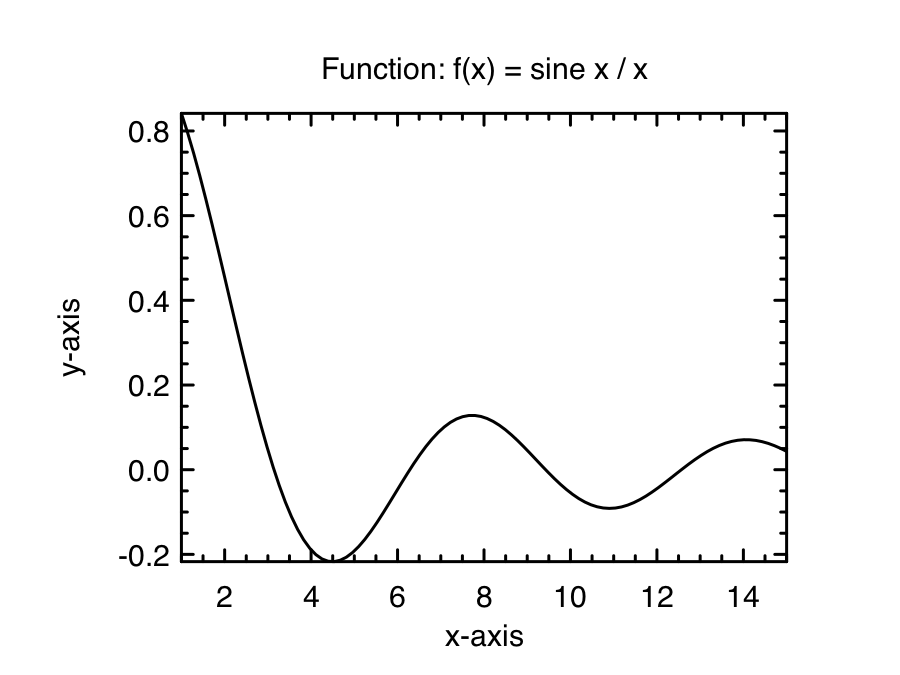

- : Jupyter_notebook.display_id = <abstr>


In [11]:
Jupyter_notebook.display_file ~base64:true "image/png" "plot_00.png"

In [18]:
open Owl_jupyter

let f x = Maths.sin x /. x in
  let h = Plot.create "plot_01.png" in
  Plot.set_title h "Function: f(x) = sine x / x";
  Plot.set_xlabel h "x-axis";
  Plot.set_ylabel h "y-axis";
  Plot.set_font_size h 8.;
  Plot.set_pen_size h 3.;
  Plot.plot_fun ~h f 1. 15.;
  Plot.output h

error: compile_error